In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf
import matplotlib
import matplotlib.pyplot as plt
# load data
r_data = pd.read_csv("../result/join_weather_flower/Rose_C0H960_草屯.csv")
r_data = r_data.dropna()
# select year
# gb_df  = r_data.groupby("year")
# r_data = gb_df.get_group(2014.0)
# print(r_data)
r_data = r_data.reset_index()
r_data = r_data.drop(columns="index")
r_data["d_temp"] = r_data['T.Max'] - r_data['T.Min']
d = np.array(r_data["Date"])
day_new=[]
for date in d:
    day_new.append(int(date.split("-")[-1]))
r_data["date_of_m"] = day_new
# r_data
tg = "avg_price"
col_x =  ['Temperature', 'T.Max', 'T.Min', 'Precp', 
          'RH', 'StnPres', 'WS', 'WSGust', "year",
          "week","d_temp","date_of_m"]
# rm "/"
for col in col_x:
    old = r_data[col]
    new = []
    for i in range(len(old)):
        try:
            new.append(float(old[i]))
            tmp = float(old[i])
        except ValueError:
            new.append(tmp)
    r_data[col] = new

x_raw = r_data[col_x]
y_raw = r_data[tg]

In [2]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_raw, 
                                                    y_raw, 
                                                    test_size=0.1)


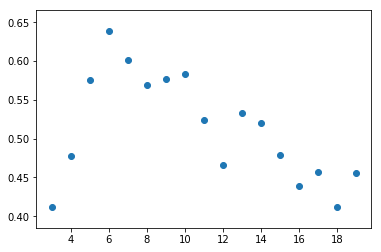

In [3]:
# DecisionTree
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score
import graphviz
from sklearn.tree import export_graphviz
r2_l = []
for k in range(3,20):
    reg = DecisionTreeRegressor(max_depth=k)
    # 訓練考古題
    reg.fit(x_train, y_train)
    g = export_graphviz(reg, feature_names=col_x, filled=True)
    result = graphviz.Source(g)
    # result.render("avg_price")
    pre = reg.predict(x_test)
    r2 =  r2_score(y_test, pre)
#     print("k:",k, "\t",r2)
    r2_l.append(r2)
# df_show = pd.DataFrame()
# df_show["pd"]= np.array(reg.predict(x_test))
# df_show["ans"] = np.array(y_test)
# df_show.to_csv("test0504ML.csv", index=False)
# df_show.corr()
# result
matplotlib.pyplot.scatter(range(3,20),r2_l)

In [34]:
reg = DecisionTreeRegressor(max_depth=7)
# 訓練考古題
reg.fit(x_train, y_train)
g = export_graphviz(reg, feature_names=col_x, filled=True)
result = graphviz.Source(g)
# result.render("avg_price")
pre = reg.predict(x_test)
r2 =  r2_score(y_test, pre)
print("k:",7, "\t",r2)
# r2_l.append(r2)
df_show = pd.DataFrame()
df_show["pd"]= np.array(reg.predict(x_test))
df_show["ans"] = np.array(y_test)
# df_show.to_csv("test0504ML.csv", index=False)
df_show.corr()
mean_squared_error(df_show["pd"], df_show["ans"])

k: 7 	 0.5850604928804857


550.3375552622158

In [11]:
from sklearn.metrics import mean_squared_error


548.052736969939

In [5]:
# (y_raw - min(y_raw)) // ((max(y_raw) - min(y_raw))/10)

In [6]:
# TODO y > diff >classific / 2d
y_diff = np.array(y_raw.pct_change())[1:]
x_drop = np.array(x_raw.drop(index=0))
# y_class =[]
# for i in len(y_diff):
# y_diff.describe()
# define new class 
y_class_range = [-0.1,0,0.1]
def c_class(v):
    t = 0
    y_class_range = [-0.1,0,0.1]
    for i in range(len(y_class_range)):
        if (v >= y_class_range[i]):
            t = i+1
#     if v>0:
#         t = t+1
    return str(t)
# 0,       1  ,2     ,3,  4
# <-0.1,  <0, =0,  <0.1, >0.1
y_class = []
for i in range(len(y_diff)):
    y_class.append(c_class(y_diff[i]))
df_tmp = pd.DataFrame()
df_tmp["diff"] = y_diff
df_tmp["class"] = y_class
df_tmp
from sklearn.preprocessing import MultiLabelBinarizer
mlb = MultiLabelBinarizer()
y_mtl = mlb.fit_transform(y_class)
# test randomForest
xtrain, xtest, ytrain, ytest = train_test_split(x_drop, y_class, test_size=0.1)
np.bincount(y_class)
# 第三種條法: 讓電腦幫我對所有參數都完成一次交叉驗證, 看一下哪組參數的結果最好

from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
params = {
    "n_estimators":range(22, 26),
    "max_depth":range(4, 9)
}
clf = RandomForestClassifier()
g = GridSearchCV(clf, params, cv=10)
# g.fit(x_drop, y_class)
# print(g.best_params_)
# print(g.best_score_)

# 使用test 過後比較好的結果
clf = RandomForestClassifier(max_depth= 5, n_estimators= 22)
# clf.fit(x_drop, y_class)

In [7]:
# class data
# TODO y > diff >classific / 2d
x_drop = np.array(x_raw.drop(index=0))
y_c5 = (y_raw - min(y_raw)) // ((max(y_raw) - min(y_raw))/5)
# test randomForest
xtrain, xtest, ytrain, ytest = train_test_split(x_drop, y_class, test_size=0.1)
np.bincount(y_c5)
# 第三種條法: 讓電腦幫我對所有參數都完成一次交叉驗證, 看一下哪組參數的結果最好
from sklearn.model_selection import GridSearchCV
params = {
    "n_estimators":range(22, 26),
    "max_depth":range(2, 6)
}
clf = RandomForestClassifier()
g = GridSearchCV(clf, params, cv=10)
# g.fit(x_raw, y_c5)
# print(g.best_params_)
# print(g.best_score_)

In [8]:
# MLP test
# y_class_range = [-0.1,0,0.1]
print("desc_count y_class:", np.bincount(y_class))

c_new =  ['Temperature','Precp','RH', 'WS',"week","d_temp","date_of_m"]
x_new =x_raw[c_new]
x_new
# to nomralize
c_to_n =['Temperature','RH', 'WS',"d_temp"]
# to class and dummy code
c_to_dum = ["date_of_m",'Precp']

# x_train, x_test, y_train, y_test = train_test_split(x_drop, y_class, test_size=0.1)

desc_count y_class: [305 567 491 352]
